# Imports

In [1]:
# import libraries here; add more as necessary
# Ignoring warnings
import warnings
warnings.filterwarnings('ignore')

# Data Manipulation
import pandas as pd

# enabling full display of a row content in a data frame
pd.set_option('display.max_colwidth', None)

# Option to suppress scientific notation in Pandas
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import numpy as np
from scipy import stats
import math
import itertools
import random

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import plot_tree

# DevOps modules
import os
import time

# Feature Selection
from sklearn.feature_selection import RFECV
from sklearn.inspection import permutation_importance

# Modelling
# Using a Classifier Chain
from sklearn.multioutput import ClassifierChain

# Using a single multi-output classifier algorithm


from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

# HyperParameter Tuning
# import optuna

# Data Scaling
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# magic word for producing visualizations in notebook
%matplotlib inline

In [2]:
# Reading the data
well_df=pd.read_csv('Data/spe_africa_dseats_datathon_2025_wells_dataset.csv')

In [3]:
well_df.head()

PROD_DATE WELL_NAME  ON_STREAM_HRS BOTTOMHOLE_FLOWING_PRESSURE (PSI)  \
0  15-Feb-14   Well_#1          0.000                             4,050   
1  16-Feb-14   Well_#1          0.000                             3,961   
2  17-Feb-14   Well_#1          0.000                             3,961   
3  18-Feb-14   Well_#1          0.000                             3,964   
4  19-Feb-14   Well_#1          0.000                             3,965   

   DOWNHOLE_TEMPERATURE (deg F) ANNULUS_PRESS (PSI)  CHOKE_SIZE (%)  \
0                       189.866                   0           1.180   
1                       189.945                   0           2.994   
2                       190.004                   0           1.903   
3                       190.020                   0           0.000   
4                       190.107                   0          30.208   

  WELL_HEAD_PRESSURE (PSI)  WELL_HEAD_TEMPERATURE (deg F)  \
0                   482.46                         50.864   
1                  328.601                         47.668   
2                  387.218                         48.962   
3                   308.98                         46.636   
4                  196.057                         47.297   

  CUMULATIVE_OIL_PROD (STB) CUMULATIVE_FORMATION_GAS_PROD (MSCF)  \
0                         0                                    0   
1                         0                                    0   
2                         0                                    0   
3                         0                                    0   
4                         0                                    0   

  CUMULATIVE_TOTAL_GAS_PROD (MSCF) CUMULATIVE_WATER_PROD (BBL)  
0                                0                           0  
1                                0                           0  
2                                0                           0  
3                                0                           0  
4                                0                           0

In [4]:
# Preliminary Informations
print('The Dataset has for {} rows and {} columns'.format(well_df.shape[0], well_df.shape[1]))

The Dataset has for 7955 rows and 13 columns


<a name="Cleaning"></a>
## 1. Data Cleaning

## Shortening the Column Names

In [5]:
# Listing all columns in current training data
well_df.columns

Index(['PROD_DATE', 'WELL_NAME', 'ON_STREAM_HRS',
       'BOTTOMHOLE_FLOWING_PRESSURE (PSI)', 'DOWNHOLE_TEMPERATURE (deg F)',
       'ANNULUS_PRESS (PSI)', 'CHOKE_SIZE (%)', 'WELL_HEAD_PRESSURE (PSI)',
       'WELL_HEAD_TEMPERATURE (deg F)', 'CUMULATIVE_OIL_PROD (STB)',
       'CUMULATIVE_FORMATION_GAS_PROD (MSCF)',
       'CUMULATIVE_TOTAL_GAS_PROD (MSCF)', 'CUMULATIVE_WATER_PROD (BBL)'],
      dtype='object')

In [6]:
# Creating a dictionary to map old names to new names
rename_map={'PROD_DATE':'date', 'WELL_NAME':'well_name', 'ON_STREAM_HRS':'on_str_hrs', 'BOTTOMHOLE_FLOWING_PRESSURE (PSI)':'bottom_hole_psi',
            'DOWNHOLE_TEMPERATURE (deg F)':'downhole_temp', 'ANNULUS_PRESS (PSI)':'Annulus_p', 'CHOKE_SIZE (%)':'choke_size',
            'WELL_HEAD_PRESSURE (PSI)':'whp', 'WELL_HEAD_TEMPERATURE (deg F)':'wht', 'CUMULATIVE_OIL_PROD (STB)':'cumm_oil_stb',
            'CUMULATIVE_FORMATION_GAS_PROD (MSCF)':'cumm_form_gas_mscf', 'CUMULATIVE_TOTAL_GAS_PROD (MSCF)':'cumm_total_gas_mscf', 
            'CUMULATIVE_WATER_PROD (BBL)':'cumm_water_bbl'}

In [7]:
# Renaming columns "INPLACE"
well_df.rename(columns=rename_map, inplace=True)

In [8]:
# Viewing top 5 rows of the data
well_df.head()

date well_name  on_str_hrs bottom_hole_psi  downhole_temp Annulus_p  \
0  15-Feb-14   Well_#1       0.000           4,050        189.866         0   
1  16-Feb-14   Well_#1       0.000           3,961        189.945         0   
2  17-Feb-14   Well_#1       0.000           3,961        190.004         0   
3  18-Feb-14   Well_#1       0.000           3,964        190.020         0   
4  19-Feb-14   Well_#1       0.000           3,965        190.107         0   

   choke_size      whp    wht cumm_oil_stb cumm_form_gas_mscf  \
0       1.180   482.46 50.864            0                  0   
1       2.994  328.601 47.668            0                  0   
2       1.903  387.218 48.962            0                  0   
3       0.000   308.98 46.636            0                  0   
4      30.208  196.057 47.297            0                  0   

  cumm_total_gas_mscf cumm_water_bbl  
0                   0              0  
1                   0              0  
2                   0              0  
3                   0              0  
4                   0              0

## Data Type check

In [9]:
well_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7955 entries, 0 to 7954
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   date                 7955 non-null   object 
 1   well_name            7955 non-null   object 
 2   on_str_hrs           7955 non-null   float64
 3   bottom_hole_psi      7955 non-null   object 
 4   downhole_temp        7955 non-null   float64
 5   Annulus_p            7955 non-null   object 
 6   choke_size           7955 non-null   float64
 7   whp                  7955 non-null   object 
 8   wht                  7955 non-null   float64
 9   cumm_oil_stb         7955 non-null   object 
 10  cumm_form_gas_mscf   7955 non-null   object 
 11  cumm_total_gas_mscf  7955 non-null   object 
 12  cumm_water_bbl       7955 non-null   object 
dtypes: float64(4), object(9)
memory usage: 808.1+ KB


## Observations
1. date should be converted to a date time type
2. bottomhole pressure should be investigated and converted to float
3. Annulus pressure should be investigated and converted to float
4. well head pressure should be investigated and converted to float
5. cummulative oil production should be investigated and converted to float
6. cummulative formation gas production should be investigated and converted to float
7. cummulative total gas should be investigated and converted to float
8. cummulative water production should be investigated and converted to float

In [10]:
#1. 
well_df['date_conv']=pd.to_datetime(well_df['date'], format='%d-%b-%y')
well_df

date well_name  on_str_hrs bottom_hole_psi  downhole_temp  \
0     15-Feb-14   Well_#1       0.000           4,050        189.866   
1     16-Feb-14   Well_#1       0.000           3,961        189.945   
2     17-Feb-14   Well_#1       0.000           3,961        190.004   
3     18-Feb-14   Well_#1       0.000           3,964        190.020   
4     19-Feb-14   Well_#1       0.000           3,965        190.107   
...         ...       ...         ...             ...            ...   
7950  05-Apr-15  Well_#20      18.940           2,505        149.177   
7951  06-Apr-15  Well_#20      21.060           2,503        149.169   
7952  07-Apr-15  Well_#20      24.000           2,481        149.175   
7953  08-Apr-15  Well_#20      15.940           2,485        149.178   
7954  09-Apr-15  Well_#20      18.060           2,510        149.139   

     Annulus_p  choke_size      whp    wht cumm_oil_stb cumm_form_gas_mscf  \
0            0       1.180   482.46 50.864            0                  0   
1            0       2.994  328.601 47.668            0                  0   
2            0       1.903  387.218 48.962            0                  0   
3            0       0.000   308.98 46.636            0                  0   
4            0      30.208  196.057 47.297            0                  0   
...        ...         ...      ...    ...          ...                ...   
7950   633.188      77.321  115.406 85.532      497,425            235,131   
7951   617.591      72.403  116.285 84.959      497,609            235,205   
7952   645.435     100.000  111.943 87.361      497,879            235,314   
7953   651.282      76.408  111.962 87.583      498,019            235,370   
7954   593.181      56.678  117.299 82.390      498,126            235,416   

     cumm_total_gas_mscf cumm_water_bbl  date_conv  
0                      0              0 2014-02-15  
1                      0              0 2014-02-16  
2                      0              0 2014-02-17  
3                      0              0 2014-02-18  
4                      0              0 2014-02-19  
...                  ...            ...        ...  
7950             352,697        522,788 2015-04-05  
7951             352,808        523,266 2015-04-06  
7952             352,971        523,885 2015-04-07  
7953             353,055        524,431 2015-04-08  
7954             353,124        524,844 2015-04-09  

[7955 rows x 14 columns]

In [11]:
well_df.columns

Index(['date', 'well_name', 'on_str_hrs', 'bottom_hole_psi', 'downhole_temp',
       'Annulus_p', 'choke_size', 'whp', 'wht', 'cumm_oil_stb',
       'cumm_form_gas_mscf', 'cumm_total_gas_mscf', 'cumm_water_bbl',
       'date_conv'],
      dtype='object')

In [12]:
#2 - 8.
# Float investigation and conversions
to_conv_to_float= ['bottom_hole_psi',
       'Annulus_p', 'whp', 'cumm_oil_stb',
       'cumm_form_gas_mscf', 'cumm_total_gas_mscf', 'cumm_water_bbl']
for col in to_conv_to_float:
    # Using try-except block for investigation
    try:
        well_df[col]=well_df[col].str.replace(',', '')
        well_df[col]=well_df[col].astype('float64')
    except Exception as e:
        print(f"Error in parsing column: {col}")
        raise Exception(e)

# Re-investigating
well_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7955 entries, 0 to 7954
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   date                 7955 non-null   object        
 1   well_name            7955 non-null   object        
 2   on_str_hrs           7955 non-null   float64       
 3   bottom_hole_psi      7955 non-null   float64       
 4   downhole_temp        7955 non-null   float64       
 5   Annulus_p            7955 non-null   float64       
 6   choke_size           7955 non-null   float64       
 7   whp                  7955 non-null   float64       
 8   wht                  7955 non-null   float64       
 9   cumm_oil_stb         7955 non-null   float64       
 10  cumm_form_gas_mscf   7955 non-null   float64       
 11  cumm_total_gas_mscf  7955 non-null   float64       
 12  cumm_water_bbl       7955 non-null   float64       
 13  date_conv            7955 non-nul

## Observations
1. There's a comma in the data and pandas is reading that as an object. Solution was to replace ',' with nothing before changing data type. This fixed everything.

   Error in parsing column: bottom_hole_psi -> Exception: could not convert string to float: '4,050'

## Consistency check for Object columns

In [13]:
# confirming that well bore name have just one value for each category
print('Unique Values for {} are {} '.format('Well Name', well_df['well_name'].unique()))

Unique Values for Well Name are ['Well_#1' 'Well_#2' 'Well_#3' 'Well_#4' 'Well_#5' 'Well_#6' 'Well_#7'
 'Well_#8' 'Well_#9' 'Well_#10' 'Well_#11' 'Well_#12' 'Well_#13'
 'Well_#14' 'Well_#15' 'Well_#16' 'Well_#17' 'Well_#18' 'Well_#19'
 'Well_#20'] 


**Observation** 

Data is consistent

## Missing data check

In [14]:
well_df.isna().sum()

date                   0
well_name              0
on_str_hrs             0
bottom_hole_psi        0
downhole_temp          0
Annulus_p              0
choke_size             0
whp                    0
wht                    0
cumm_oil_stb           0
cumm_form_gas_mscf     0
cumm_total_gas_mscf    0
cumm_water_bbl         0
date_conv              0
dtype: int64

**Observation**

There is no missing data

## Duplicates Check

In [15]:
dup = well_df.duplicated()
well_df[dup]

Empty DataFrame
Columns: [date, well_name, on_str_hrs, bottom_hole_psi, downhole_temp, Annulus_p, choke_size, whp, wht, cumm_oil_stb, cumm_form_gas_mscf, cumm_total_gas_mscf, cumm_water_bbl, date_conv]
Index: []

**Observation**

There are no duplicate entries in the dataset

In [16]:
well_df

date well_name  on_str_hrs  bottom_hole_psi  downhole_temp  \
0     15-Feb-14   Well_#1       0.000         4050.000        189.866   
1     16-Feb-14   Well_#1       0.000         3961.000        189.945   
2     17-Feb-14   Well_#1       0.000         3961.000        190.004   
3     18-Feb-14   Well_#1       0.000         3964.000        190.020   
4     19-Feb-14   Well_#1       0.000         3965.000        190.107   
...         ...       ...         ...              ...            ...   
7950  05-Apr-15  Well_#20      18.940         2505.000        149.177   
7951  06-Apr-15  Well_#20      21.060         2503.000        149.169   
7952  07-Apr-15  Well_#20      24.000         2481.000        149.175   
7953  08-Apr-15  Well_#20      15.940         2485.000        149.178   
7954  09-Apr-15  Well_#20      18.060         2510.000        149.139   

      Annulus_p  choke_size     whp    wht  cumm_oil_stb  cumm_form_gas_mscf  \
0         0.000       1.180 482.460 50.864         0.000               0.000   
1         0.000       2.994 328.601 47.668         0.000               0.000   
2         0.000       1.903 387.218 48.962         0.000               0.000   
3         0.000       0.000 308.980 46.636         0.000               0.000   
4         0.000      30.208 196.057 47.297         0.000               0.000   
...         ...         ...     ...    ...           ...                 ...   
7950    633.188      77.321 115.406 85.532    497425.000          235131.000   
7951    617.591      72.403 116.285 84.959    497609.000          235205.000   
7952    645.435     100.000 111.943 87.361    497879.000          235314.000   
7953    651.282      76.408 111.962 87.583    498019.000          235370.000   
7954    593.181      56.678 117.299 82.390    498126.000          235416.000   

      cumm_total_gas_mscf  cumm_water_bbl  date_conv  
0                   0.000           0.000 2014-02-15  
1                   0.000           0.000 2014-02-16  
2                   0.000           0.000 2014-02-17  
3                   0.000           0.000 2014-02-18  
4                   0.000           0.000 2014-02-19  
...                   ...             ...        ...  
7950           352697.000      522788.000 2015-04-05  
7951           352808.000      523266.000 2015-04-06  
7952           352971.000      523885.000 2015-04-07  
7953           353055.000      524431.000 2015-04-08  
7954           353124.000      524844.000 2015-04-09  

[7955 rows x 14 columns]

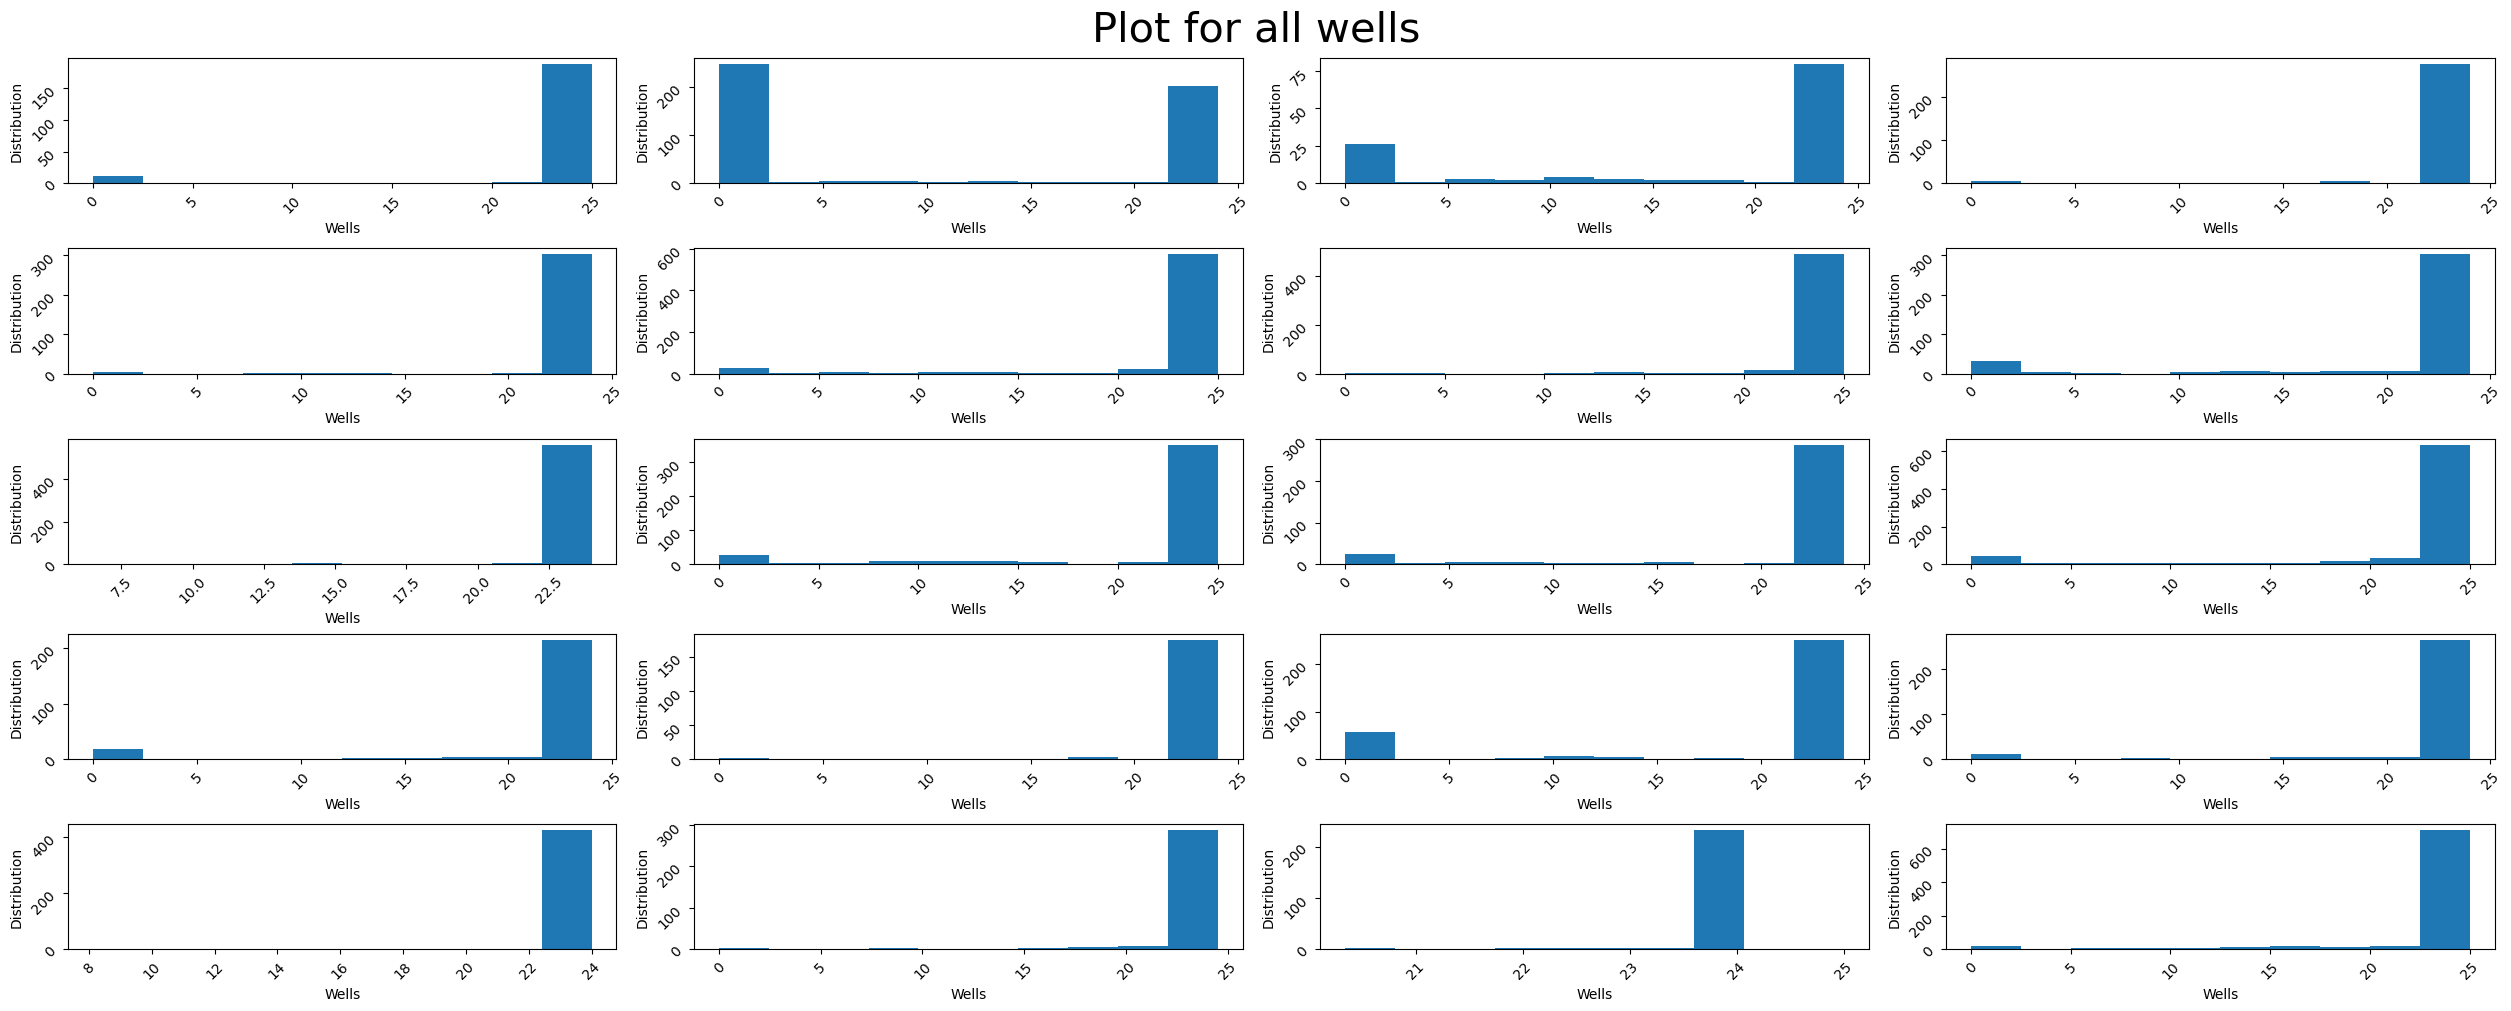

In [17]:
# Initial removal of unimportant features. Checking the trend on on stream hours. Our assumption is that it's mostly 24hrs
# Visualizing with a box plot across wells
# From the trends, we get a sense of which features trend similarly. Below, we access the linearity of features with oil
subplot_locations=list(itertools.product([0,1,2,3,4], [0,1,2,3]))
fig, ax = plt.subplots(nrows=5, ncols=4, constrained_layout=True)
fig.suptitle('Plot for all wells', fontsize=30)
fig.set_size_inches(25, 10)

for well, subplot_location in zip(well_df['well_name'].unique(), subplot_locations):
    ax[subplot_location[0],subplot_location[1]].hist(well_df[well_df.well_name==well]['on_str_hrs'])
    ax[subplot_location[0],subplot_location[1]].tick_params(labelrotation=45)
    ax[subplot_location[0],subplot_location[1]].set_xlabel('Wells')
    ax[subplot_location[0],subplot_location[1]].set_ylabel('Distribution')
plt.show()

**Observation**

Most cases have a 24 hours stream on time but there's variation in some wells. So, we decided to leave that feature.

<a name="eda"></a>
# 2. EDA

In [18]:
# skipping EDA for empirical analysis

<a name="empirical analysis"></a>
## 3. Empirical Analysis

1) Identify the reservoir each well is producing from assuming not more than 200 psi differential pressure at the maximum bottom hole pressure. 
2) Determine for each reservoir whether saturated or undersaturated using the initial condition.
3) Identify whether the well is naturally flowing or gas lifted.

In [19]:
# Helper Functions
def get_reservoir(max_well_psi, rsv_col_to_use='init_psi'):
    rsv_output=[]
    for rsv in rsv_details.rsv_name.unique():
        #print(rsv)
        rsv_psi=rsv_details[rsv_details.rsv_name==rsv][rsv_col_to_use].values[0]
        #rsv_psi=int(rsv_psi.replace(',',''))
        #print(rsv_psi)
        # Taking into consideration the constraints in question 1
        # and also that the bottom hole flowing pressure cannot be more than the reservoir pressure
        psi_differential=rsv_psi-max_well_psi
        #lower_bound_rsv_psi=rsv_psi-200
        #upper_bound_rsv_psi=rsv_psi+200
        
        # Now, if psi_differential is <= 200, well is most likely from that reservoir
        if psi_differential<=200 and psi_differential>=0:
            rsv_output.append(f"{rsv_psi} -> {rsv}")
        else:
            pass
    return ', '.join(rsv_output)

def get_saturation_type(bool_):
    if bool_==True:
        return 'Saturated'
    elif bool_==False:
        return 'Undersat'

def get_rsv_name(rsv, kind='name'):
    if kind == 'name':
        return rsv[-4:]
    else:
        return rsv[0:4]

def plot_template(df, all_wells, coordinates, column, save='Y'):
    fig, ax = plt.subplots(nrows=10, ncols=2, constrained_layout=True)
    fig.suptitle('Plot for all wells', fontsize=30)
    fig.set_size_inches(20, 50)
    if 'gor' in column.lower():
        for well, subplot_location in zip(all_wells, coordinates):
            ax[subplot_location[0],subplot_location[1]].plot(df[df.well_name==well].date_conv, df[df.well_name==well][column])
            ax[subplot_location[0],subplot_location[1]].plot(df[df.well_name==well].date_conv, df[df.well_name==well]['solution_gor'])
            ax[subplot_location[0],subplot_location[1]].tick_params(labelrotation=45)
            ax[subplot_location[0],subplot_location[1]].set_xlabel('Date')
            ax[subplot_location[0],subplot_location[1]].set_ylabel(column)
            ax[subplot_location[0],subplot_location[1]].set_title(well)
            ax[subplot_location[0],subplot_location[1]].grid()
    else:
        for well, subplot_location in zip(all_wells, coordinates):
            ax[subplot_location[0],subplot_location[1]].plot(df[df.well_name==well].date_conv, df[df.well_name==well][column])
            ax[subplot_location[0],subplot_location[1]].tick_params(labelrotation=45)
            ax[subplot_location[0],subplot_location[1]].set_xlabel('Date')
            ax[subplot_location[0],subplot_location[1]].set_ylabel(column)
            ax[subplot_location[0],subplot_location[1]].set_title(well)
            ax[subplot_location[0],subplot_location[1]].grid()
    if save=='Y':
        plt.savefig(f"{column}.png", dpi=500, bbox_inches='tight')
    else:
        pass
    plt.show()
    
def get_trend(df, all_wells, column, save='Y'):
    subplot_locations=list(itertools.product(list(range(10)), [0,1]))
    plot_template(df, all_wells, subplot_locations, column)

In [20]:
# Loading the Reservoir data
rsv_details=pd.read_csv('Data/reservoir_info.csv')

In [21]:
rsv_details.columns

Index(['Reservoir Name', 'Initial Reservoir Pressure (PSI)',
       'Bubble Point Pressure (PSI)',
       'Current Average Reservoir Pressure (PSI)',
       'Solution Gas-Oil-Ratio (SCF/BBL)', 'Formation Volume Factor (RB/STB)'],
      dtype='object')

In [22]:
rsv_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Reservoir Name                            5 non-null      object 
 1   Initial Reservoir Pressure (PSI)          5 non-null      object 
 2   Bubble Point Pressure (PSI)               5 non-null      object 
 3   Current Average Reservoir Pressure (PSI)  5 non-null      object 
 4   Solution Gas-Oil-Ratio (SCF/BBL)          5 non-null      object 
 5   Formation Volume Factor (RB/STB)          5 non-null      float64
dtypes: float64(1), object(5)
memory usage: 372.0+ bytes


In [23]:
# renaming columns
# Creating a dictionary to map old names to new names
rsv_rename_map={'Reservoir Name':'rsv_name','Initial Reservoir Pressure (PSI)':'init_psi', 'Bubble Point Pressure (PSI)':'bubble_psi',
               'Current Average Reservoir Pressure (PSI)':'current_avg_psi','Solution Gas-Oil-Ratio (SCF/BBL)':'solution_gor',
                'Formation Volume Factor (RB/STB)':'form_v_fact'}

In [24]:
# Renaming columns "INPLACE"
rsv_details.rename(columns=rsv_rename_map, inplace=True)

In [25]:
rsv_details

rsv_name init_psi bubble_psi current_avg_psi solution_gor  form_v_fact
0     ACHI    3,500      3,300           2,700          800        1.200
1     KEMA    4,200      4,000           3,900          600        1.450
2     MAKO    3,500      3,500           3,000          500        1.150
3     DEPU    2,800      2,800           2,400        1,200        1.370
4     JANI    4,500      4,300           4,200        1,000        1.300

In [26]:
rsv_details.columns

Index(['rsv_name', 'init_psi', 'bubble_psi', 'current_avg_psi', 'solution_gor',
       'form_v_fact'],
      dtype='object')

In [27]:
# Quick Cleaning
# Float investigation and conversions
conv_cols=['init_psi', 'bubble_psi', 'current_avg_psi', 'solution_gor']

for col in conv_cols:
    # Using try-except block for investigation
    try:
        # Same issue of , in the data is here
        rsv_details[col]=rsv_details[col].str.replace(',', '')
        rsv_details[col]=rsv_details[col].astype('float64')
    except Exception as e:
        print(f"Error in parsing column: {col}")
        raise Exception(e)

In [28]:
rsv_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rsv_name         5 non-null      object 
 1   init_psi         5 non-null      float64
 2   bubble_psi       5 non-null      float64
 3   current_avg_psi  5 non-null      float64
 4   solution_gor     5 non-null      float64
 5   form_v_fact      5 non-null      float64
dtypes: float64(5), object(1)
memory usage: 372.0+ bytes


#### 1) Identify the reservoir each well is producing from assuming not more than 200 psi differential pressure at the maximum bottom hole pressure.

In [29]:
# Obtaining Max bottomhole pressure for all the wells
max_well_bottom_psis = well_df.groupby(['well_name'], as_index=False)['bottom_hole_psi'].max().sort_values('bottom_hole_psi', ascending=False)

# Applying helper function to max psi df
max_well_bottom_psis['reservoir']=max_well_bottom_psis['bottom_hole_psi'].apply(get_reservoir, rsv_col_to_use='init_psi')

In [30]:
max_well_bottom_psis

well_name  bottom_hole_psi       reservoir
0    Well_#1         4096.000  4200.0 -> KEMA
1   Well_#10         4051.000  4200.0 -> KEMA
10  Well_#19         4036.000  4200.0 -> KEMA
6   Well_#15         4032.000  4200.0 -> KEMA
7   Well_#16         3836.000                
17   Well_#7         3821.000                
16   Well_#6         3797.000                
11   Well_#2         3735.000                
13   Well_#3         2985.000                
15   Well_#5         2933.000                
12  Well_#20         2858.000                
5   Well_#14         2857.000                
18   Well_#8         2681.000  2800.0 -> DEPU
9   Well_#18         2621.000  2800.0 -> DEPU
3   Well_#12         2557.000                
2   Well_#11         2521.000                
14   Well_#4         2340.000                
19   Well_#9         2333.000                
8   Well_#17         2304.000                
4   Well_#13         2246.000

## Observation
Using the Initial PSI, we run into an issue where we can't get the reservoir of many wells. To remedy that, we try the same thing with the current average psi.

In [31]:
# Applying helper function to max psi df with current average this time
max_well_bottom_psis['reservoir_using_avg']=max_well_bottom_psis['bottom_hole_psi'].apply(get_reservoir, rsv_col_to_use='current_avg_psi')

In [32]:
#max_well_bottom_psis.to_excel('reservoirs.xlsx')

In [33]:
max_well_bottom_psis.sort_values('well_name',  key=lambda col: col.str.replace('Well_#', '').astype('int'), inplace=True)

In [34]:
max_well_bottom_psis

well_name  bottom_hole_psi       reservoir reservoir_using_avg
0    Well_#1         4096.000  4200.0 -> KEMA      4200.0 -> JANI
11   Well_#2         3735.000                      3900.0 -> KEMA
13   Well_#3         2985.000                      3000.0 -> MAKO
14   Well_#4         2340.000                      2400.0 -> DEPU
15   Well_#5         2933.000                      3000.0 -> MAKO
16   Well_#6         3797.000                      3900.0 -> KEMA
17   Well_#7         3821.000                      3900.0 -> KEMA
18   Well_#8         2681.000  2800.0 -> DEPU      2700.0 -> ACHI
19   Well_#9         2333.000                      2400.0 -> DEPU
1   Well_#10         4051.000  4200.0 -> KEMA      4200.0 -> JANI
2   Well_#11         2521.000                      2700.0 -> ACHI
3   Well_#12         2557.000                      2700.0 -> ACHI
4   Well_#13         2246.000                      2400.0 -> DEPU
5   Well_#14         2857.000                      3000.0 -> MAKO
6   Well_#15         4032.000  4200.0 -> KEMA      4200.0 -> JANI
7   Well_#16         3836.000                      3900.0 -> KEMA
8   Well_#17         2304.000                      2400.0 -> DEPU
9   Well_#18         2621.000  2800.0 -> DEPU      2700.0 -> ACHI
10  Well_#19         4036.000  4200.0 -> KEMA      4200.0 -> JANI
12  Well_#20         2858.000                      3000.0 -> MAKO

In [35]:
# We decided to get the bottomhole Flowing pressure which is the pressure where oil and gas production had started
# removing days where both oil and gas is 0

non_zero_days=well_df.copy()
non_zero_days=non_zero_days[(non_zero_days.cumm_oil_stb!=0)&(non_zero_days.cumm_form_gas_mscf!=0)]

In [36]:
# Recomputing max
# Obtaining Max bottomhole pressure for all the wells
max_well_bottom_psis_nz = non_zero_days.groupby(['well_name'], as_index=False)['bottom_hole_psi'].max().sort_values('bottom_hole_psi', ascending=False)

# Applying helper function to max psi df
max_well_bottom_psis_nz['reservoir']=max_well_bottom_psis_nz['bottom_hole_psi'].apply(get_reservoir, rsv_col_to_use='init_psi')
max_well_bottom_psis_nz['reservoir_with_avg']=max_well_bottom_psis_nz['bottom_hole_psi'].apply(get_reservoir, rsv_col_to_use='current_avg_psi')

In [37]:
max_well_bottom_psis_nz.sort_values('well_name',  key=lambda col: col.str.replace('Well_#', '').astype('int'), inplace=True)

In [38]:
# Using bhfp , we are unable to classify well 16
max_well_bottom_psis_nz

well_name  bottom_hole_psi       reservoir reservoir_with_avg
0    Well_#1         3777.000                     3900.0 -> KEMA
11   Well_#2         3735.000                     3900.0 -> KEMA
13   Well_#3         2985.000                     3000.0 -> MAKO
14   Well_#4         2340.000                     2400.0 -> DEPU
15   Well_#5         2933.000                     3000.0 -> MAKO
16   Well_#6         3797.000                     3900.0 -> KEMA
17   Well_#7         3821.000                     3900.0 -> KEMA
18   Well_#8         2681.000  2800.0 -> DEPU     2700.0 -> ACHI
19   Well_#9         2333.000                     2400.0 -> DEPU
1   Well_#10         4051.000  4200.0 -> KEMA     4200.0 -> JANI
2   Well_#11         2521.000                     2700.0 -> ACHI
3   Well_#12         2557.000                     2700.0 -> ACHI
4   Well_#13         2246.000                     2400.0 -> DEPU
5   Well_#14         2857.000                     3000.0 -> MAKO
6   Well_#15         4032.000  4200.0 -> KEMA     4200.0 -> JANI
7   Well_#16         3244.000                                   
8   Well_#17         2304.000                     2400.0 -> DEPU
9   Well_#18         2621.000  2800.0 -> DEPU     2700.0 -> ACHI
10  Well_#19         4036.000  4200.0 -> KEMA     4200.0 -> JANI
12  Well_#20         2858.000                     3000.0 -> MAKO

In [39]:
#max_well_bottom_psis.to_excel('reservoirs_with_bhp.xlsx', index=False)
#max_well_bottom_psis_nz.to_excel('reservoirs_bhfp.xlsx', index=False)

**Summaries**

1. We are able to classifiy all the wells using the current average psi and the maximum bottom hole pressure.

#### 2) Determine for each reservoir whether saturated or undersaturated using the initial condition.
1. Reservoir is Saturated when the Initial Pressure <= Bubble point
2. Reservoir is Undersaturated when the Initial Pressure > Bubble point

In [40]:
# Adding the Undersat/Saturated details to the rsv dataframe
rsv_details['rsv_type'] = rsv_details['init_psi'] <= rsv_details['bubble_psi']
rsv_details['rsv_type'] = rsv_details['rsv_type'].map(get_saturation_type)

In [41]:
rsv_details

rsv_name  init_psi  bubble_psi  current_avg_psi  solution_gor  form_v_fact  \
0     ACHI  3500.000    3300.000         2700.000       800.000        1.200   
1     KEMA  4200.000    4000.000         3900.000       600.000        1.450   
2     MAKO  3500.000    3500.000         3000.000       500.000        1.150   
3     DEPU  2800.000    2800.000         2400.000      1200.000        1.370   
4     JANI  4500.000    4300.000         4200.000      1000.000        1.300   

    rsv_type  
0   Undersat  
1   Undersat  
2  Saturated  
3  Saturated  
4   Undersat

#### 3) Identify whether the well is naturally flowing or gas lifted
The well is Naturally flowing when formation gas is equal to the total gas. So, we will need the dataset to classify these.

In [42]:
well_df

date well_name  on_str_hrs  bottom_hole_psi  downhole_temp  \
0     15-Feb-14   Well_#1       0.000         4050.000        189.866   
1     16-Feb-14   Well_#1       0.000         3961.000        189.945   
2     17-Feb-14   Well_#1       0.000         3961.000        190.004   
3     18-Feb-14   Well_#1       0.000         3964.000        190.020   
4     19-Feb-14   Well_#1       0.000         3965.000        190.107   
...         ...       ...         ...              ...            ...   
7950  05-Apr-15  Well_#20      18.940         2505.000        149.177   
7951  06-Apr-15  Well_#20      21.060         2503.000        149.169   
7952  07-Apr-15  Well_#20      24.000         2481.000        149.175   
7953  08-Apr-15  Well_#20      15.940         2485.000        149.178   
7954  09-Apr-15  Well_#20      18.060         2510.000        149.139   

      Annulus_p  choke_size     whp    wht  cumm_oil_stb  cumm_form_gas_mscf  \
0         0.000       1.180 482.460 50.864         0.000               0.000   
1         0.000       2.994 328.601 47.668         0.000               0.000   
2         0.000       1.903 387.218 48.962         0.000               0.000   
3         0.000       0.000 308.980 46.636         0.000               0.000   
4         0.000      30.208 196.057 47.297         0.000               0.000   
...         ...         ...     ...    ...           ...                 ...   
7950    633.188      77.321 115.406 85.532    497425.000          235131.000   
7951    617.591      72.403 116.285 84.959    497609.000          235205.000   
7952    645.435     100.000 111.943 87.361    497879.000          235314.000   
7953    651.282      76.408 111.962 87.583    498019.000          235370.000   
7954    593.181      56.678 117.299 82.390    498126.000          235416.000   

      cumm_total_gas_mscf  cumm_water_bbl  date_conv  
0                   0.000           0.000 2014-02-15  
1                   0.000           0.000 2014-02-16  
2                   0.000           0.000 2014-02-17  
3                   0.000           0.000 2014-02-18  
4                   0.000           0.000 2014-02-19  
...                   ...             ...        ...  
7950           352697.000      522788.000 2015-04-05  
7951           352808.000      523266.000 2015-04-06  
7952           352971.000      523885.000 2015-04-07  
7953           353055.000      524431.000 2015-04-08  
7954           353124.000      524844.000 2015-04-09  

[7955 rows x 14 columns]

In [43]:
# Obtaining the well oil, formation gas, total gas and water production from the cummulative
all_wells=well_df.well_name.unique()

In [44]:
well_df.columns

Index(['date', 'well_name', 'on_str_hrs', 'bottom_hole_psi', 'downhole_temp',
       'Annulus_p', 'choke_size', 'whp', 'wht', 'cumm_oil_stb',
       'cumm_form_gas_mscf', 'cumm_total_gas_mscf', 'cumm_water_bbl',
       'date_conv'],
      dtype='object')

In [45]:
cumm_feats=['cumm_oil_stb', 'cumm_form_gas_mscf', 'cumm_total_gas_mscf', 'cumm_water_bbl']
cp=well_df.copy()
df_=pd.DataFrame(columns=['date', 'well_name', 'on_str_hrs', 'bottom_hole_psi', 'downhole_temp',
       'Annulus_p', 'choke_size', 'whp', 'wht', 'cumm_oil_stb',
       'cumm_form_gas_mscf', 'cumm_total_gas_mscf', 'cumm_water_bbl',
       'date_conv', 'oil_stb', 'form_gas_mscf', 'total_gas_mscf', 'water_bbl'])
                 
for well_n in all_wells:
    df=cp[cp.well_name==well_n]
    shp=df.shape
    df.sort_values('date_conv', ascending=True, inplace=True)
    for feat in cumm_feats:
        new_feat=feat.replace('cumm_', '')
        df[new_feat]=df[feat]-df[feat].shift(1)
        df.fillna(method='bfill', inplace=True)
        #display(df)
    # Confirming that well is natural flowing or not
    equal_count=sum(df['form_gas_mscf']==df['total_gas_mscf'])
    df_=pd.concat([df_,df], axis=0)

    if equal_count==shp[0]:
        print(f"{well_n} is Natural Flowing")
    else:
        print(f"{well_n} is Gas Lifted")
    

    

Well_#1 is Gas Lifted
Well_#2 is Natural Flowing
Well_#3 is Gas Lifted
Well_#4 is Gas Lifted
Well_#5 is Natural Flowing
Well_#6 is Natural Flowing
Well_#7 is Gas Lifted
Well_#8 is Gas Lifted
Well_#9 is Gas Lifted
Well_#10 is Natural Flowing
Well_#11 is Gas Lifted
Well_#12 is Natural Flowing
Well_#13 is Natural Flowing
Well_#14 is Natural Flowing
Well_#15 is Natural Flowing
Well_#16 is Natural Flowing
Well_#17 is Gas Lifted
Well_#18 is Natural Flowing
Well_#19 is Natural Flowing
Well_#20 is Gas Lifted


In [46]:
well_df_analysis=df_

In [47]:
well_df_analysis.drop(cumm_feats, axis=1, inplace=True)

In [48]:
#well_df_analysis.to_csv('tt.csv')

In [49]:
well_df_analysis.head()

date well_name  on_str_hrs  bottom_hole_psi  downhole_temp  Annulus_p  \
0  15-Feb-14   Well_#1       0.000         4050.000        189.866      0.000   
1  16-Feb-14   Well_#1       0.000         3961.000        189.945      0.000   
2  17-Feb-14   Well_#1       0.000         3961.000        190.004      0.000   
3  18-Feb-14   Well_#1       0.000         3964.000        190.020      0.000   
4  19-Feb-14   Well_#1       0.000         3965.000        190.107      0.000   

   choke_size     whp    wht  date_conv  oil_stb  form_gas_mscf  \
0       1.180 482.460 50.864 2014-02-15    0.000          0.000   
1       2.994 328.601 47.668 2014-02-16    0.000          0.000   
2       1.903 387.218 48.962 2014-02-17    0.000          0.000   
3       0.000 308.980 46.636 2014-02-18    0.000          0.000   
4      30.208 196.057 47.297 2014-02-19    0.000          0.000   

   total_gas_mscf  water_bbl  
0           0.000      0.000  
1           0.000      0.000  
2           0.000      0.000  
3           0.000      0.000  
4           0.000      0.000

In [50]:
# Adding the Reservoir details to the dataframe
max_well_bottom_psis['rsv_name']=max_well_bottom_psis['reservoir_using_avg'].apply(get_rsv_name)
max_well_bottom_psis['rsv_value']=max_well_bottom_psis['reservoir_using_avg'].apply(get_rsv_name, kind='value')

In [51]:
rsv_details

rsv_name  init_psi  bubble_psi  current_avg_psi  solution_gor  form_v_fact  \
0     ACHI  3500.000    3300.000         2700.000       800.000        1.200   
1     KEMA  4200.000    4000.000         3900.000       600.000        1.450   
2     MAKO  3500.000    3500.000         3000.000       500.000        1.150   
3     DEPU  2800.000    2800.000         2400.000      1200.000        1.370   
4     JANI  4500.000    4300.000         4200.000      1000.000        1.300   

    rsv_type  
0   Undersat  
1   Undersat  
2  Saturated  
3  Saturated  
4   Undersat

In [52]:
# Adding Solution GOR value based on reservoir
max_well_bottom_psis=pd.merge(max_well_bottom_psis, rsv_details[['rsv_name', 'solution_gor']], on='rsv_name', how='left')

In [53]:
max_well_bottom_psis

well_name  bottom_hole_psi       reservoir reservoir_using_avg rsv_name  \
0    Well_#1         4096.000  4200.0 -> KEMA      4200.0 -> JANI     JANI   
1    Well_#2         3735.000                      3900.0 -> KEMA     KEMA   
2    Well_#3         2985.000                      3000.0 -> MAKO     MAKO   
3    Well_#4         2340.000                      2400.0 -> DEPU     DEPU   
4    Well_#5         2933.000                      3000.0 -> MAKO     MAKO   
5    Well_#6         3797.000                      3900.0 -> KEMA     KEMA   
6    Well_#7         3821.000                      3900.0 -> KEMA     KEMA   
7    Well_#8         2681.000  2800.0 -> DEPU      2700.0 -> ACHI     ACHI   
8    Well_#9         2333.000                      2400.0 -> DEPU     DEPU   
9   Well_#10         4051.000  4200.0 -> KEMA      4200.0 -> JANI     JANI   
10  Well_#11         2521.000                      2700.0 -> ACHI     ACHI   
11  Well_#12         2557.000                      2700.0 -> ACHI     ACHI   
12  Well_#13         2246.000                      2400.0 -> DEPU     DEPU   
13  Well_#14         2857.000                      3000.0 -> MAKO     MAKO   
14  Well_#15         4032.000  4200.0 -> KEMA      4200.0 -> JANI     JANI   
15  Well_#16         3836.000                      3900.0 -> KEMA     KEMA   
16  Well_#17         2304.000                      2400.0 -> DEPU     DEPU   
17  Well_#18         2621.000  2800.0 -> DEPU      2700.0 -> ACHI     ACHI   
18  Well_#19         4036.000  4200.0 -> KEMA      4200.0 -> JANI     JANI   
19  Well_#20         2858.000                      3000.0 -> MAKO     MAKO   

   rsv_value  solution_gor  
0       4200      1000.000  
1       3900       600.000  
2       3000       500.000  
3       2400      1200.000  
4       3000       500.000  
5       3900       600.000  
6       3900       600.000  
7       2700       800.000  
8       2400      1200.000  
9       4200      1000.000  
10      2700       800.000  
11      2700       800.000  
12      2400      1200.000  
13      3000       500.000  
14      4200      1000.000  
15      3900       600.000  
16      2400      1200.000  
17      2700       800.000  
18      4200      1000.000  
19      3000       500.000

In [54]:
well_df_analysis=pd.merge(well_df_analysis, max_well_bottom_psis[['well_name', 'rsv_name', 'rsv_value', 'solution_gor']], on='well_name', how='left')

In [55]:
well_df_analysis

date well_name  on_str_hrs  bottom_hole_psi  downhole_temp  \
0     15-Feb-14   Well_#1       0.000         4050.000        189.866   
1     16-Feb-14   Well_#1       0.000         3961.000        189.945   
2     17-Feb-14   Well_#1       0.000         3961.000        190.004   
3     18-Feb-14   Well_#1       0.000         3964.000        190.020   
4     19-Feb-14   Well_#1       0.000         3965.000        190.107   
...         ...       ...         ...              ...            ...   
7950  05-Apr-15  Well_#20      18.940         2505.000        149.177   
7951  06-Apr-15  Well_#20      21.060         2503.000        149.169   
7952  07-Apr-15  Well_#20      24.000         2481.000        149.175   
7953  08-Apr-15  Well_#20      15.940         2485.000        149.178   
7954  09-Apr-15  Well_#20      18.060         2510.000        149.139   

      Annulus_p  choke_size     whp    wht  date_conv  oil_stb  form_gas_mscf  \
0         0.000       1.180 482.460 50.864 2014-02-15    0.000          0.000   
1         0.000       2.994 328.601 47.668 2014-02-16    0.000          0.000   
2         0.000       1.903 387.218 48.962 2014-02-17    0.000          0.000   
3         0.000       0.000 308.980 46.636 2014-02-18    0.000          0.000   
4         0.000      30.208 196.057 47.297 2014-02-19    0.000          0.000   
...         ...         ...     ...    ...        ...      ...            ...   
7950    633.188      77.321 115.406 85.532 2015-04-05  170.000         67.000   
7951    617.591      72.403 116.285 84.959 2015-04-06  184.000         74.000   
7952    645.435     100.000 111.943 87.361 2015-04-07  270.000        109.000   
7953    651.282      76.408 111.962 87.583 2015-04-08  140.000         56.000   
7954    593.181      56.678 117.299 82.390 2015-04-09  107.000         46.000   

      total_gas_mscf  water_bbl rsv_name rsv_value  solution_gor  
0              0.000      0.000     JANI      4200      1000.000  
1              0.000      0.000     JANI      4200      1000.000  
2              0.000      0.000     JANI      4200      1000.000  
3              0.000      0.000     JANI      4200      1000.000  
4              0.000      0.000     JANI      4200      1000.000  
...              ...        ...      ...       ...           ...  
7950         101.000    445.000     MAKO      3000       500.000  
7951         111.000    478.000     MAKO      3000       500.000  
7952         163.000    619.000     MAKO      3000       500.000  
7953          84.000    546.000     MAKO      3000       500.000  
7954          69.000    413.000     MAKO      3000       500.000  

[7955 rows x 17 columns]

In [56]:
well_df_analysis['rsv_value'] = well_df_analysis['rsv_value'].astype('float64')
well_df_analysis['solution_gor'] = well_df_analysis['solution_gor'].astype('float64')
well_df_analysis

date well_name  on_str_hrs  bottom_hole_psi  downhole_temp  \
0     15-Feb-14   Well_#1       0.000         4050.000        189.866   
1     16-Feb-14   Well_#1       0.000         3961.000        189.945   
2     17-Feb-14   Well_#1       0.000         3961.000        190.004   
3     18-Feb-14   Well_#1       0.000         3964.000        190.020   
4     19-Feb-14   Well_#1       0.000         3965.000        190.107   
...         ...       ...         ...              ...            ...   
7950  05-Apr-15  Well_#20      18.940         2505.000        149.177   
7951  06-Apr-15  Well_#20      21.060         2503.000        149.169   
7952  07-Apr-15  Well_#20      24.000         2481.000        149.175   
7953  08-Apr-15  Well_#20      15.940         2485.000        149.178   
7954  09-Apr-15  Well_#20      18.060         2510.000        149.139   

      Annulus_p  choke_size     whp    wht  date_conv  oil_stb  form_gas_mscf  \
0         0.000       1.180 482.460 50.864 2014-02-15    0.000          0.000   
1         0.000       2.994 328.601 47.668 2014-02-16    0.000          0.000   
2         0.000       1.903 387.218 48.962 2014-02-17    0.000          0.000   
3         0.000       0.000 308.980 46.636 2014-02-18    0.000          0.000   
4         0.000      30.208 196.057 47.297 2014-02-19    0.000          0.000   
...         ...         ...     ...    ...        ...      ...            ...   
7950    633.188      77.321 115.406 85.532 2015-04-05  170.000         67.000   
7951    617.591      72.403 116.285 84.959 2015-04-06  184.000         74.000   
7952    645.435     100.000 111.943 87.361 2015-04-07  270.000        109.000   
7953    651.282      76.408 111.962 87.583 2015-04-08  140.000         56.000   
7954    593.181      56.678 117.299 82.390 2015-04-09  107.000         46.000   

      total_gas_mscf  water_bbl rsv_name  rsv_value  solution_gor  
0              0.000      0.000     JANI   4200.000      1000.000  
1              0.000      0.000     JANI   4200.000      1000.000  
2              0.000      0.000     JANI   4200.000      1000.000  
3              0.000      0.000     JANI   4200.000      1000.000  
4              0.000      0.000     JANI   4200.000      1000.000  
...              ...        ...      ...        ...           ...  
7950         101.000    445.000     MAKO   3000.000       500.000  
7951         111.000    478.000     MAKO   3000.000       500.000  
7952         163.000    619.000     MAKO   3000.000       500.000  
7953          84.000    546.000     MAKO   3000.000       500.000  
7954          69.000    413.000     MAKO   3000.000       500.000  

[7955 rows x 17 columns]

#### 4) Determine if production from a well is steady or unsteady. Consider unsteady wells as those with more than 50% drop in oil production at least once every 3 to 6 months 

#### 5) Determine from the formation GOR trend whether the well is flowing at/below or above the solution GOR of the selected reservoir or a combination of both trends

Formation Gas-Oil Ratio (GOR) is the formation gas production divided by the oil production.

In [57]:
well_df_analysis.head()

date well_name  on_str_hrs  bottom_hole_psi  downhole_temp  Annulus_p  \
0  15-Feb-14   Well_#1       0.000         4050.000        189.866      0.000   
1  16-Feb-14   Well_#1       0.000         3961.000        189.945      0.000   
2  17-Feb-14   Well_#1       0.000         3961.000        190.004      0.000   
3  18-Feb-14   Well_#1       0.000         3964.000        190.020      0.000   
4  19-Feb-14   Well_#1       0.000         3965.000        190.107      0.000   

   choke_size     whp    wht  date_conv  oil_stb  form_gas_mscf  \
0       1.180 482.460 50.864 2014-02-15    0.000          0.000   
1       2.994 328.601 47.668 2014-02-16    0.000          0.000   
2       1.903 387.218 48.962 2014-02-17    0.000          0.000   
3       0.000 308.980 46.636 2014-02-18    0.000          0.000   
4      30.208 196.057 47.297 2014-02-19    0.000          0.000   

   total_gas_mscf  water_bbl rsv_name  rsv_value  solution_gor  
0           0.000      0.000     JANI   4200.000      1000.000  
1           0.000      0.000     JANI   4200.000      1000.000  
2           0.000      0.000     JANI   4200.000      1000.000  
3           0.000      0.000     JANI   4200.000      1000.000  
4           0.000      0.000     JANI   4200.000      1000.000

In [58]:
well_df_analysis['formation_GOR']=(well_df_analysis['form_gas_mscf']*1000)/(well_df_analysis['oil_stb']+0.0000001)

In [61]:
well_df_analysis.head(15)

date well_name  on_str_hrs  bottom_hole_psi  downhole_temp  \
0   15-Feb-14   Well_#1       0.000         4050.000        189.866   
1   16-Feb-14   Well_#1       0.000         3961.000        189.945   
2   17-Feb-14   Well_#1       0.000         3961.000        190.004   
3   18-Feb-14   Well_#1       0.000         3964.000        190.020   
4   19-Feb-14   Well_#1       0.000         3965.000        190.107   
5   20-Feb-14   Well_#1       0.000         3964.000        190.181   
6   21-Feb-14   Well_#1       0.000         3972.000        189.939   
7   22-Feb-14   Well_#1       0.000         3978.000        189.609   
8   23-Feb-14   Well_#1       0.000         3985.000        189.435   
9   24-Feb-14   Well_#1       0.000         4096.000        189.343   
10  25-Feb-14   Well_#1       0.000         3933.000        199.472   
11  26-Feb-14   Well_#1      12.000         3777.000        205.561   
12  27-Feb-14   Well_#1      24.000         3527.000        207.698   
13  28-Feb-14   Well_#1      24.000         3430.000        208.071   
14  01-Mar-14   Well_#1      24.000         3335.000        208.240   

    Annulus_p  choke_size      whp     wht  date_conv  oil_stb  form_gas_mscf  \
0       0.000       1.180  482.460  50.864 2014-02-15    0.000          0.000   
1       0.000       2.994  328.601  47.668 2014-02-16    0.000          0.000   
2       0.000       1.903  387.218  48.962 2014-02-17    0.000          0.000   
3       0.000       0.000  308.980  46.636 2014-02-18    0.000          0.000   
4       0.000      30.208  196.057  47.297 2014-02-19    0.000          0.000   
5       0.000       0.000   58.036  47.878 2014-02-20    0.000          0.000   
6       0.000      39.999  304.692  47.938 2014-02-21    0.000          0.000   
7       0.000       0.000  453.734  49.351 2014-02-22    0.000          0.000   
8       0.000       0.424  667.130  49.351 2014-02-23    0.000          0.000   
9       0.000       0.441  440.036  49.316 2014-02-24    0.000          0.000   
10      0.000      20.360 1377.340  66.554 2014-02-25    0.000          0.000   
11   1049.640      42.043 1557.760  82.885 2014-02-26  631.000        636.000   
12    962.464      45.752 1456.120 116.828 2014-02-27 1167.000       1166.000   
13    998.020      46.300 1375.620 120.235 2014-02-28 1550.000       1560.000   
14    977.291      47.078 1271.450 122.467 2014-03-01 1248.000       1252.000   

    total_gas_mscf  water_bbl rsv_name  rsv_value  solution_gor  formation_GOR  
0            0.000      0.000     JANI   4200.000      1000.000          0.000  
1            0.000      0.000     JANI   4200.000      1000.000          0.000  
2            0.000      0.000     JANI   4200.000      1000.000          0.000  
3            0.000      0.000     JANI   4200.000      1000.000          0.000  
4            0.000      0.000     JANI   4200.000      1000.000          0.000  
5            0.000      0.000     JANI   4200.000      1000.000          0.000  
6            0.000      0.000     JANI   4200.000      1000.000          0.000  
7            0.000      0.000     JANI   4200.000      1000.000          0.000  
8            0.000      0.000     JANI   4200.000      1000.000          0.000  
9            0.000      0.000     JANI   4200.000      1000.000          0.000  
10           0.000      0.000     JANI   4200.000      1000.000          0.000  
11         852.000      0.000     JANI   4200.000      1000.000       1007.924  
12        1666.000      0.000     JANI   4200.000      1000.000        999.143  
13        2197.000      0.000     JANI   4200.000      1000.000       1006.452  
14        1799.000      0.000     JANI   4200.000      1000.000       1003.205

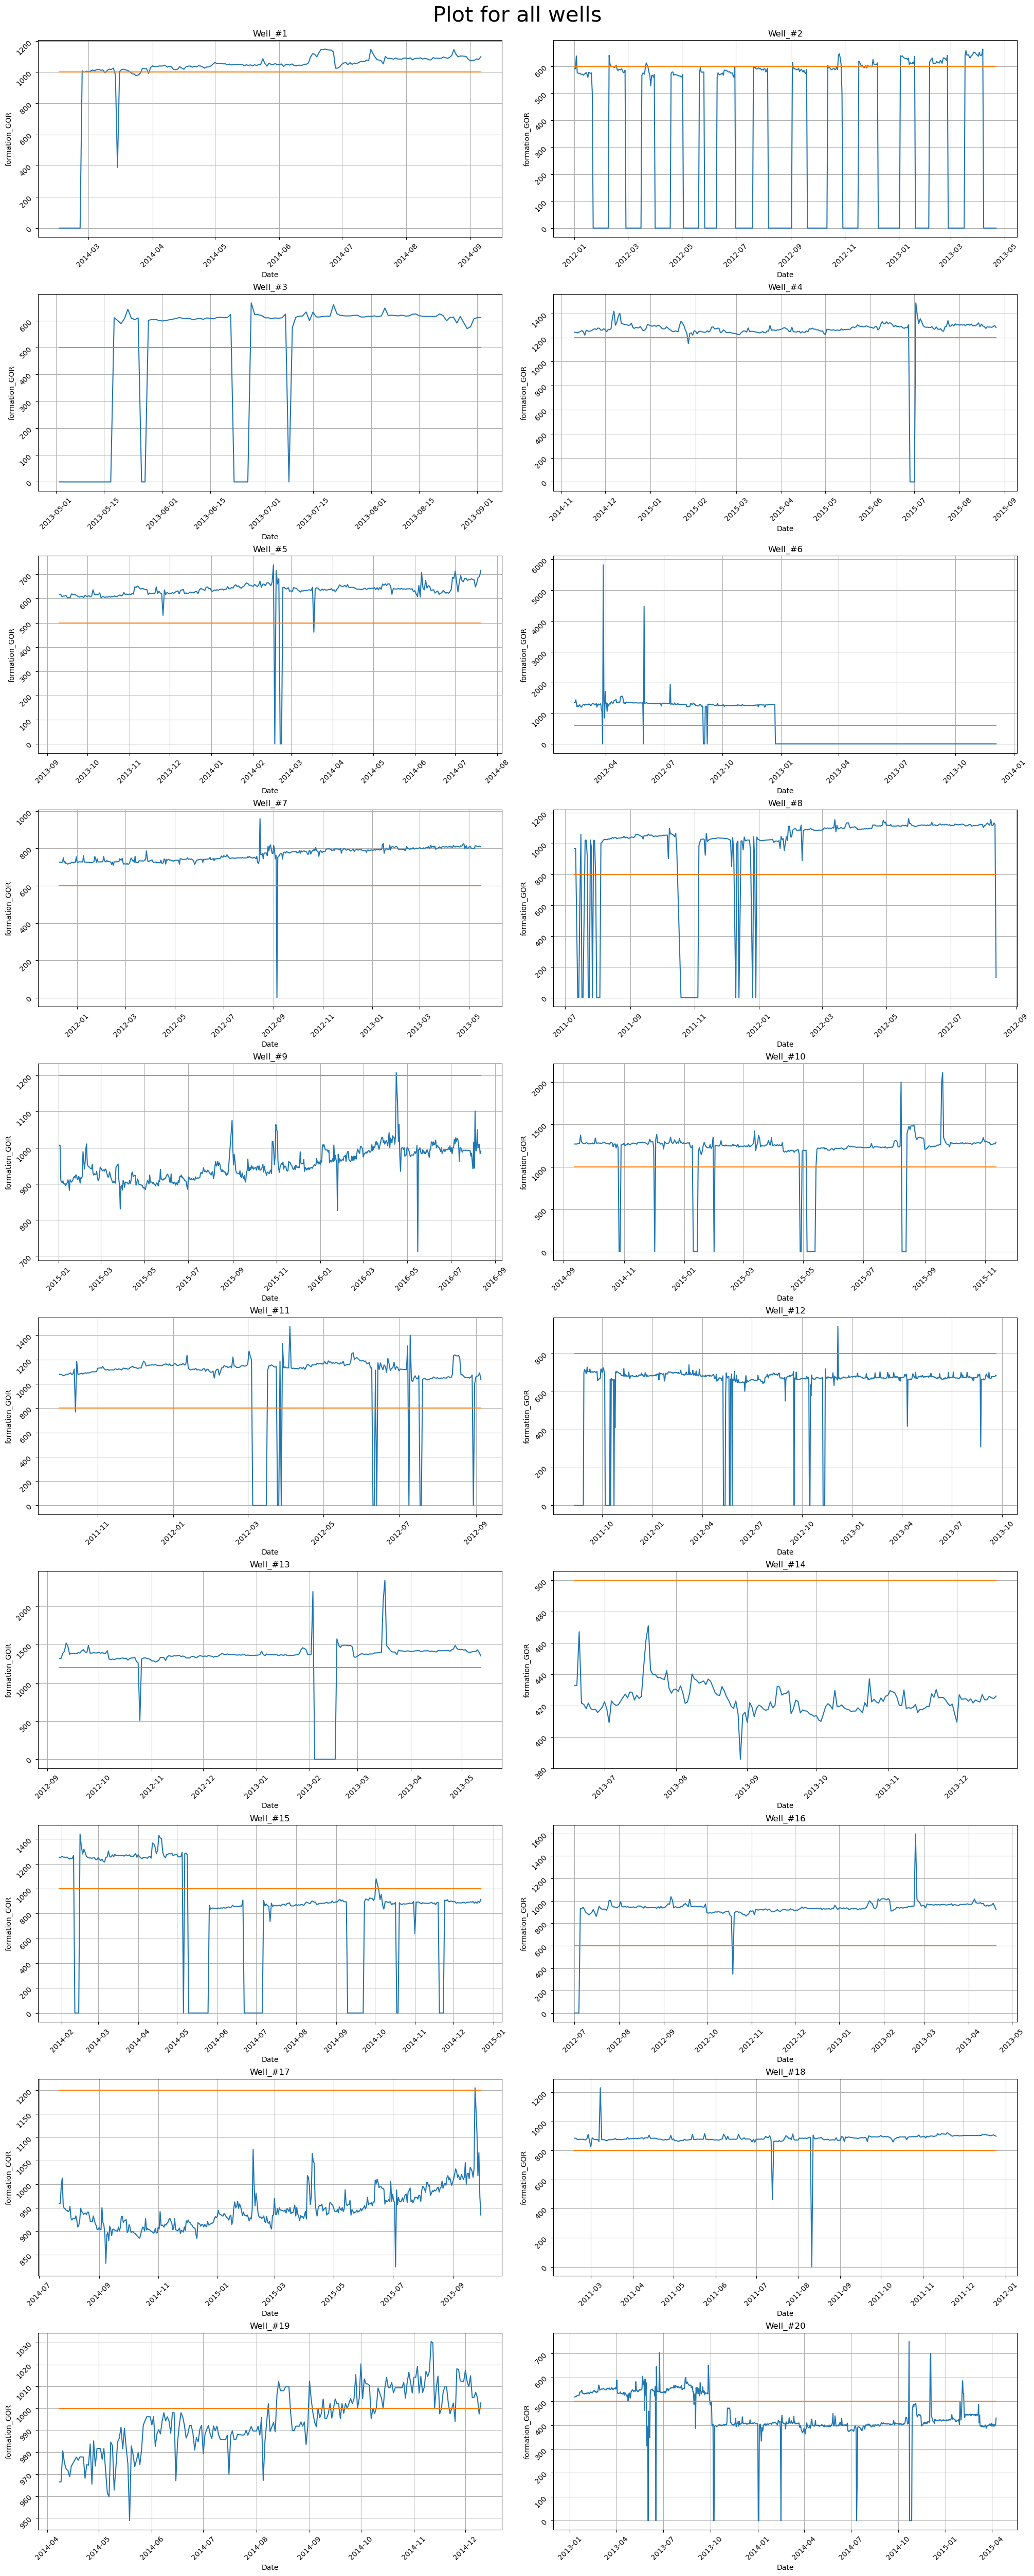

In [62]:
get_trend(well_df_analysis, all_wells, 'formation_GOR')

#### 6) Determine from the watercut trend whether it is Flat, Increasing, Decreasing or a Combination of 2 or more trends.

Water cut is percentage of liquid that is water. 

In [63]:
well_df_analysis.columns

Index(['date', 'well_name', 'on_str_hrs', 'bottom_hole_psi', 'downhole_temp',
       'Annulus_p', 'choke_size', 'whp', 'wht', 'date_conv', 'oil_stb',
       'form_gas_mscf', 'total_gas_mscf', 'water_bbl', 'rsv_name', 'rsv_value',
       'solution_gor', 'formation_GOR'],
      dtype='object')

In [64]:
well_df_analysis['water_cut']=(well_df_analysis['water_bbl']/(well_df_analysis['oil_stb']+well_df_analysis['water_bbl']+0.0000001))*100

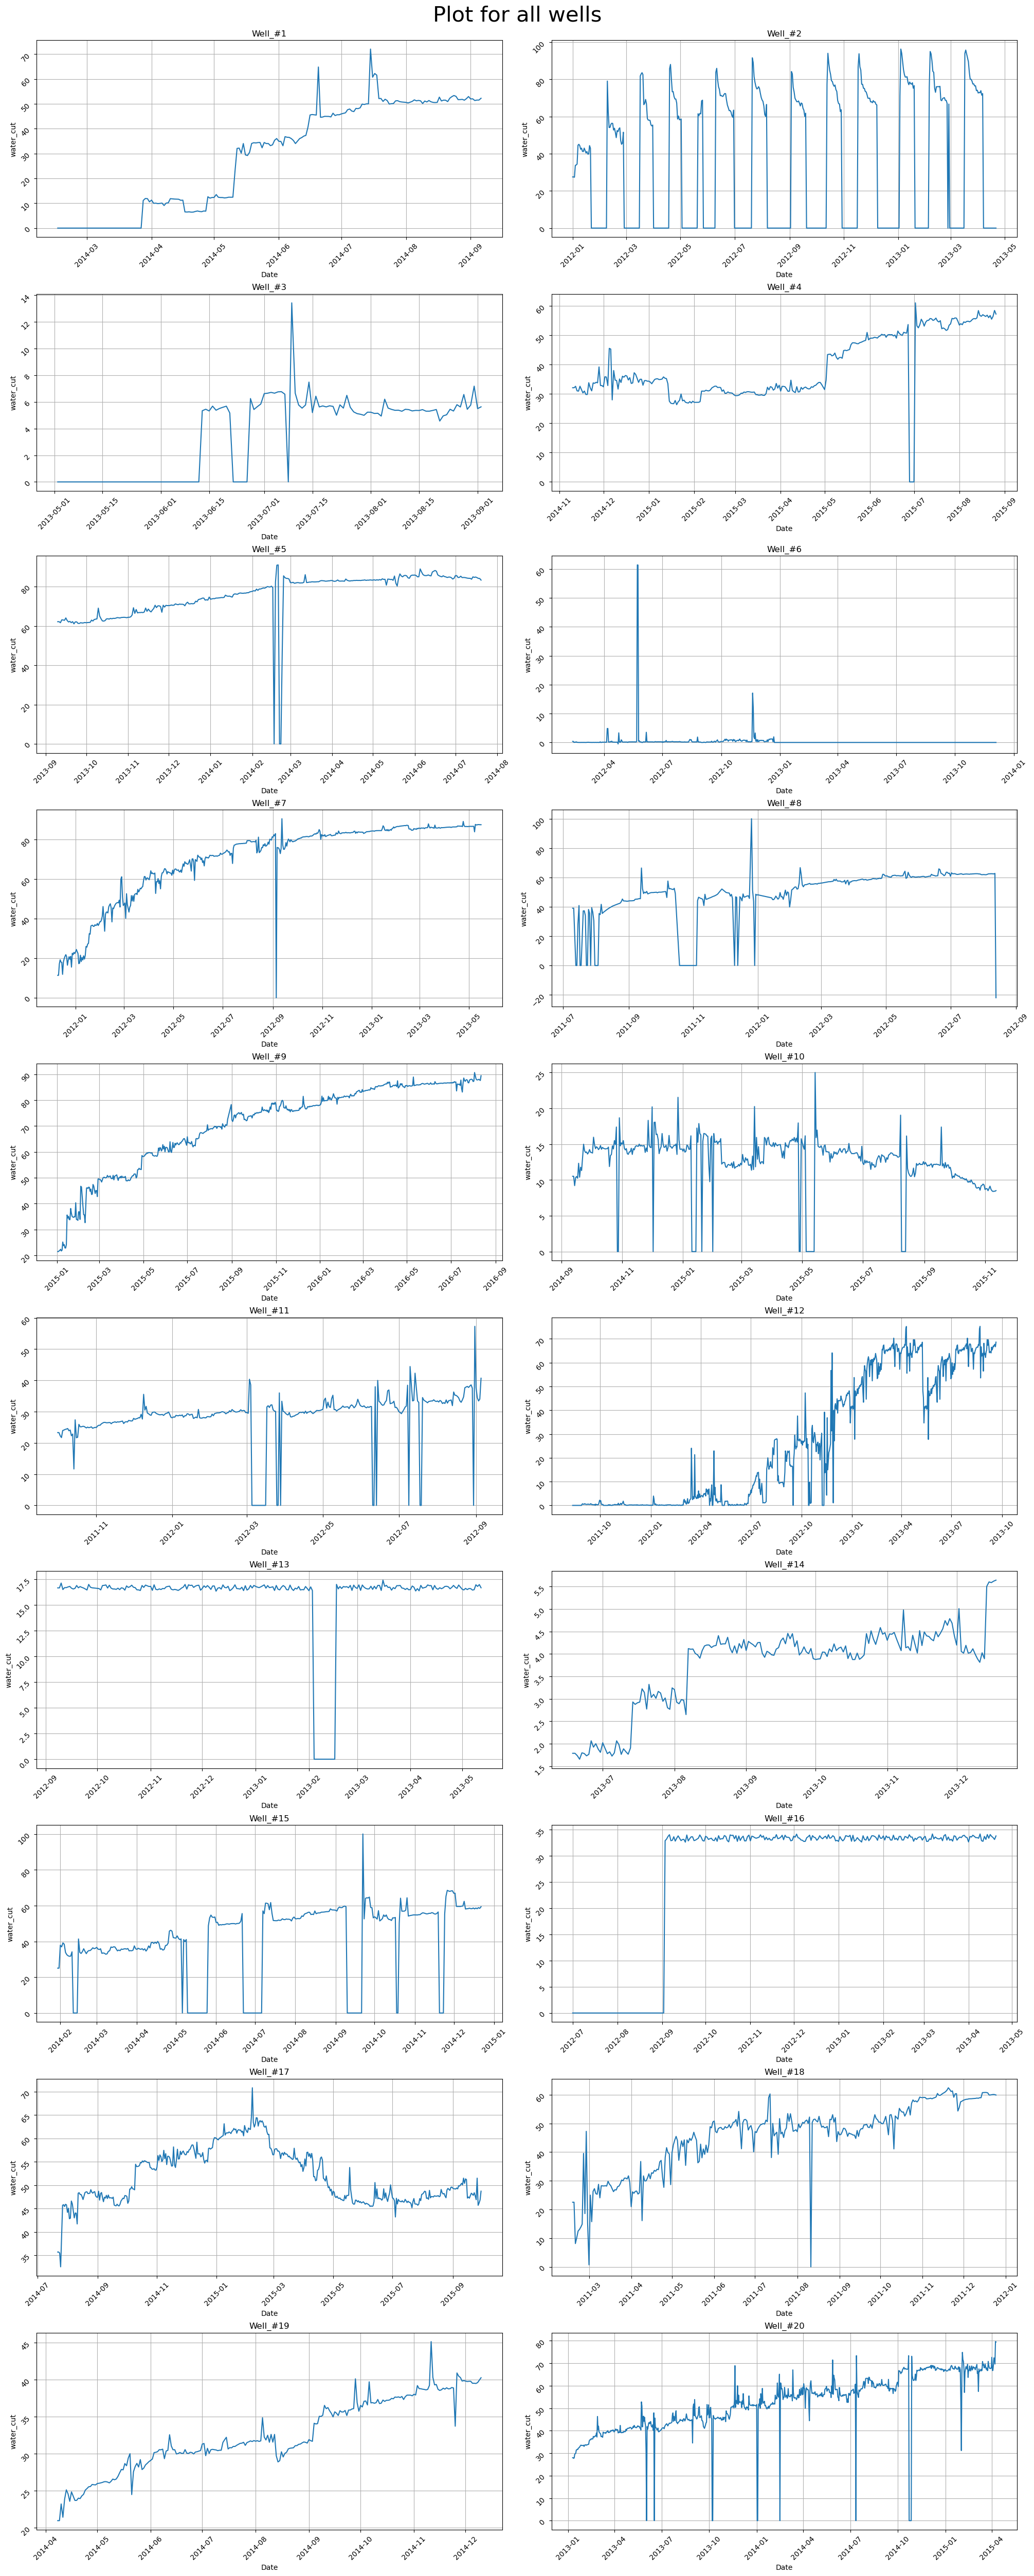

In [65]:
get_trend(well_df_analysis, all_wells, 'water_cut')

#### 7) Determine from the oil productivity index trend whether it is Flat, Increasing, Decreasing or a Combination of 2 or more trends. You may use average reservoir pressure for the oil productivity index computation 

In [66]:
well_df_analysis['pi']=(well_df_analysis['oil_stb']/(well_df_analysis['rsv_value']-well_df_analysis['bottom_hole_psi']+0.0000001))

In [67]:
well_df_analysis.head(10)

date well_name  on_str_hrs  bottom_hole_psi  downhole_temp  Annulus_p  \
0  15-Feb-14   Well_#1       0.000         4050.000        189.866      0.000   
1  16-Feb-14   Well_#1       0.000         3961.000        189.945      0.000   
2  17-Feb-14   Well_#1       0.000         3961.000        190.004      0.000   
3  18-Feb-14   Well_#1       0.000         3964.000        190.020      0.000   
4  19-Feb-14   Well_#1       0.000         3965.000        190.107      0.000   
5  20-Feb-14   Well_#1       0.000         3964.000        190.181      0.000   
6  21-Feb-14   Well_#1       0.000         3972.000        189.939      0.000   
7  22-Feb-14   Well_#1       0.000         3978.000        189.609      0.000   
8  23-Feb-14   Well_#1       0.000         3985.000        189.435      0.000   
9  24-Feb-14   Well_#1       0.000         4096.000        189.343      0.000   

   choke_size     whp    wht  date_conv  oil_stb  form_gas_mscf  \
0       1.180 482.460 50.864 2014-02-15    0.000          0.000   
1       2.994 328.601 47.668 2014-02-16    0.000          0.000   
2       1.903 387.218 48.962 2014-02-17    0.000          0.000   
3       0.000 308.980 46.636 2014-02-18    0.000          0.000   
4      30.208 196.057 47.297 2014-02-19    0.000          0.000   
5       0.000  58.036 47.878 2014-02-20    0.000          0.000   
6      39.999 304.692 47.938 2014-02-21    0.000          0.000   
7       0.000 453.734 49.351 2014-02-22    0.000          0.000   
8       0.424 667.130 49.351 2014-02-23    0.000          0.000   
9       0.441 440.036 49.316 2014-02-24    0.000          0.000   

   total_gas_mscf  water_bbl rsv_name  rsv_value  solution_gor  formation_GOR  \
0           0.000      0.000     JANI   4200.000      1000.000          0.000   
1           0.000      0.000     JANI   4200.000      1000.000          0.000   
2           0.000      0.000     JANI   4200.000      1000.000          0.000   
3           0.000      0.000     JANI   4200.000      1000.000          0.000   
4           0.000      0.000     JANI   4200.000      1000.000          0.000   
5           0.000      0.000     JANI   4200.000      1000.000          0.000   
6           0.000      0.000     JANI   4200.000      1000.000          0.000   
7           0.000      0.000     JANI   4200.000      1000.000          0.000   
8           0.000      0.000     JANI   4200.000      1000.000          0.000   
9           0.000      0.000     JANI   4200.000      1000.000          0.000   

   water_cut    pi  
0      0.000 0.000  
1      0.000 0.000  
2      0.000 0.000  
3      0.000 0.000  
4      0.000 0.000  
5      0.000 0.000  
6      0.000 0.000  
7      0.000 0.000  
8      0.000 0.000  
9      0.000 0.000

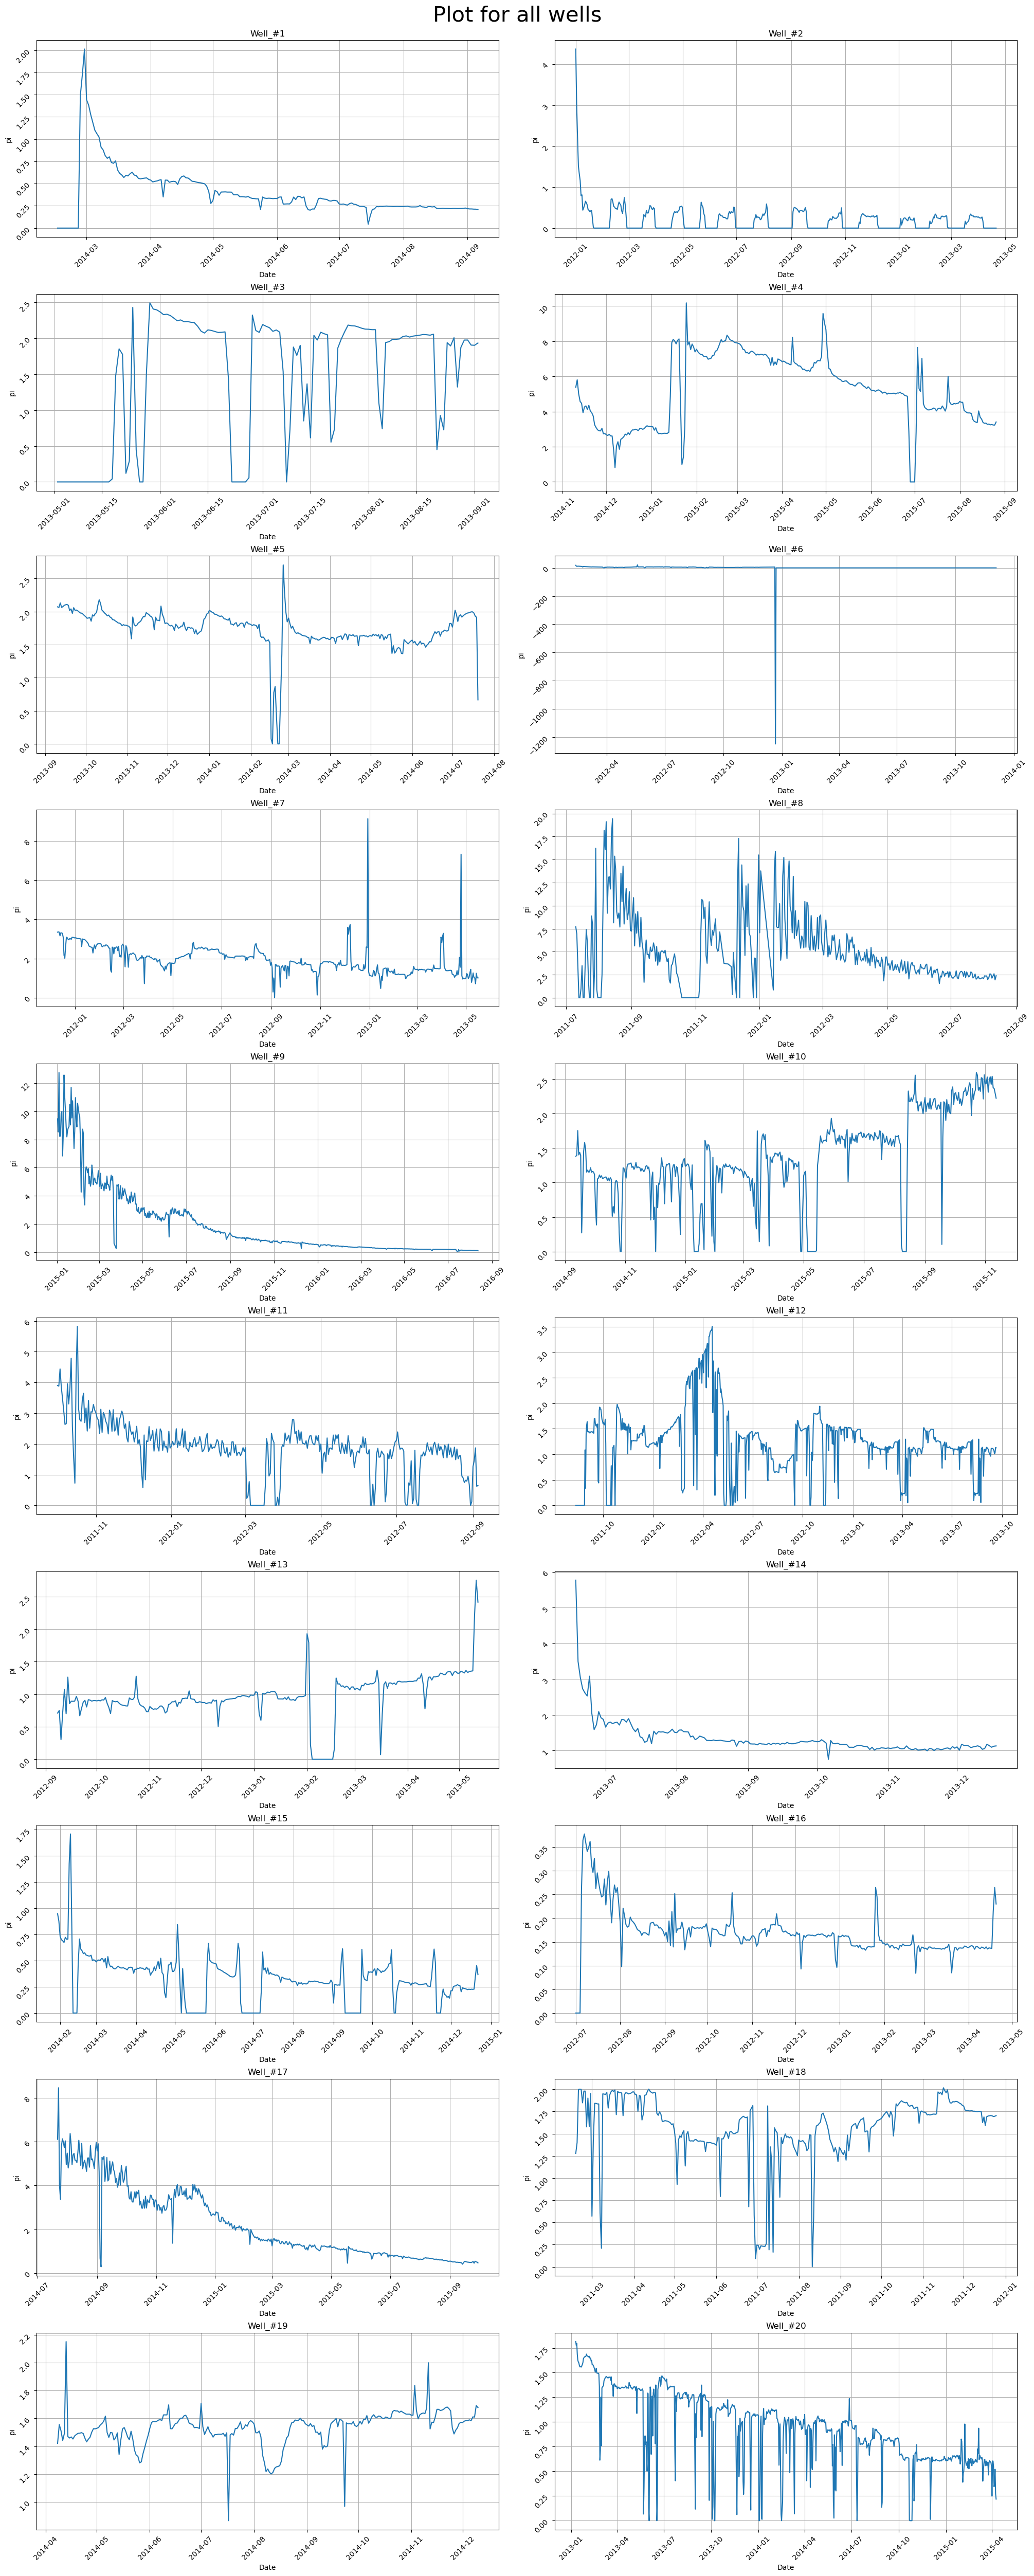

In [68]:
get_trend(well_df_analysis, all_wells, 'pi')

In [23]:
# Quickly testing multi-output classifier, can we use seperate count of classes in one label?
# Yes we can, we can try this.

from sklearn.datasets import make_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.utils import shuffle
import numpy as np
X, y1 = make_classification(n_samples=10, n_features=100,
                            n_informative=30, n_classes=3,
                            random_state=1)
y2 = shuffle(y1, random_state=1)
y2[y2==2]=1
y3 = shuffle(y1, random_state=2)

Y = np.vstack((y1, y2, y3)).T
n_samples, n_features = X.shape # 10,100
n_outputs = Y.shape[1] # 3
n_classes = 3
forest = RandomForestClassifier(random_state=1)
multi_target_forest = MultiOutputClassifier(forest, n_jobs=2)
multi_target_forest.fit(X, Y).predict(X)

array([[2, 1, 0],
       [1, 1, 1],
       [2, 1, 0],
       [0, 0, 2],
       [0, 1, 1],
       [0, 0, 2],
       [1, 1, 0],
       [1, 1, 1],
       [0, 0, 2],
       [2, 0, 0]])